# Rotating Coild Data Analysis for SI S15 Skew Excitation (Many)

## Import libraries and Load measurement data

In [1]:
import sys
import numpy as np
from scipy.interpolate import interp1d
import matplotlib
matplotlib.use('Qt5Agg')

%matplotlib notebook

import matplotlib.pyplot as plt
from lnls.rotcoil import *

In [2]:
magfiles = {
'S135A_4-QS5.5A': [
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182417.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182440.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182505.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182529.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182554.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182617.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182642.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182706.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182730.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182753.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182817.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182841.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182906.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182929.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_182953.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_183018.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_183041.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_183106.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_183131.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_183156.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_183220.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_183244.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_4/S15-236_S_BOA_135.0A_181026_183308.dat',
    ],
'S135A_5-QS5.5A': [
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184212.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184237.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184302.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184325.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184349.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184414.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184438.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184501.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184525.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184549.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184614.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184637.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184702.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184727.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184751.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184814.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184839.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184904.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184929.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_184952.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_185017.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_185042.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_185106.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_185129.dat',
    'S15-236_Estudos_Efeitos_QS_5.5A_Sextupolo_135A_5/S15-236_S_BOA_135.0A_181026_185154.dat',
    ],
# 'S115A_1-QS': [
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_160812.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_160836.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_160900.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_160925.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_160949.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161012.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161037.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161101.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161126.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161151.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161215.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161240.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161305.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161328.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161353.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161417.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161442.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161506.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161529.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161554.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161618.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161642.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161706.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161730.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_115A_1/S15-236_S_BOA_115.0A_181026_161754.dat',
#     ],
'S135A_1-QS': [
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_155227.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_155252.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_155316.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_155341.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_155405.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_155428.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_155453.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_155517.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_155540.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_155605.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_155629.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_155653.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_155717.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_160021.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_160045.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_160110.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_160134.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_160157.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_160222.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_160246.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_160311.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_160335.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_160359.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_160424.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_1/S15-236_S_BOA_135.0A_181026_160448.dat',
    ],
'S135A_2-QS': [
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174349.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174413.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174437.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174501.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174526.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174550.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174614.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174639.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174702.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174727.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174751.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174816.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174839.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174904.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174928.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_174951.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_175016.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_175041.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_175105.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_175128.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_175153.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_175217.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_175241.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_175305.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_2/S15-236_S_BOA_135.0A_181026_175328.dat',
    ],
'S135A_3-QS': [
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181157.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181222.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181246.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181310.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181334.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181359.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181423.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181446.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181510.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181534.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181557.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181622.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181646.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181710.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181735.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181759.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181824.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181847.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181911.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_181935.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_182000.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_182024.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_182049.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_182114.dat',
    'S15-236_Estudos_Efeitos_QS_Sextupolo_135A_3/S15-236_S_BOA_135.0A_181026_182137.dat',
    ],
# 'S055A_1-QS': [
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_172630.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_172655.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_172718.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_172742.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_172807.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_172831.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_172856.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_172919.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_172944.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173008.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173032.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173056.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173121.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173145.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173211.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173235.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173300.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173323.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173348.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173412.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173436.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173500.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173525.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173548.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_55A_1/S15-236_S_BOA_055.0A_181026_173612.dat',
#     ],
# 'S075A_1-QS': [
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_171447.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_171511.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_171536.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_171600.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_171625.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_171650.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_171713.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_171738.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_171803.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_171827.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_171850.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_171914.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_171939.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_172002.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_172026.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_172050.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_172114.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_172138.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_172202.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_172227.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_172251.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_172316.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_172340.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_172404.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_75A_1/S15-236_S_BOA_075.0A_181026_172428.dat',
#     ],
# 'S095A_1-QS': [
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165403.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165428.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165452.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165515.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165540.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165604.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165628.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165651.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165716.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165741.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165806.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165830.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165853.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165918.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_165943.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_170007.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_170032.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_170056.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_170120.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_170144.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_170209.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_170233.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_170257.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_170321.dat',
#     'S15-236_Estudos_Efeitos_QS_Sextupolo_95A_1/S15-236_S_BOA_095.0A_181026_170345.dat',
#     ]
}

base_path = (
    '/home/fac_files/lnls-ima/si-sextupoles-s15/model-07/measurement/' +
    'magnetic/rotcoil/2018-10-26-sextupoles-qs/S15-236/')
magnet_family = ''
magnet_coil = ''
data_set = ''


def load_rotcoil(serial, fname):
    path2 = base_path + magnet_family + serial + '/' + magnet_coil
    path3 = path2 + data_set + '/' + fname
    data = RotCoilData(path3, 1)
    return data
    
    
def load_data(magfiles):
    
    serials = sorted(magfiles.keys())

    qs_coil_current_avg, main_coil_current_avg, temperature = [], [], []
    nmpole_0, nmpole_1, nmpole_2 = [], [], []
    smpole_0, smpole_1, smpole_2 = [], [], []
    for i in range(len(serials)):
        shape = len(magfiles[serials[i]])
        qs_coil_current_avg.append(np.zeros(shape))
        main_coil_current_avg.append(np.zeros(shape))
        temperature.append(np.zeros(shape))
        nmpole_0.append(np.zeros(shape))
        nmpole_1.append(np.zeros(shape))
        nmpole_2.append(np.zeros(shape))
        smpole_0.append(np.zeros(shape))
        smpole_1.append(np.zeros(shape))
        smpole_2.append(np.zeros(shape))
        files = magfiles[serials[i]]
        for j in range(len(files)):
            d = load_rotcoil('', files[j])
            main_coil_current_avg[i][j] = d.main_coil_current_avg
            qs_coil_current_avg[i][j] = d.qs_coil_current_avg
            temperature[i][j] = d.temperature
            nmpole_0[i][j] = d.intmpole_normal_avg[0]
            nmpole_1[i][j] = d.intmpole_normal_avg[1]
            nmpole_2[i][j] = d.intmpole_normal_avg[2]
            smpole_0[i][j] = d.intmpole_skew_avg[0]
            smpole_1[i][j] = d.intmpole_skew_avg[1]
            smpole_2[i][j] = d.intmpole_skew_avg[2]
    return serials, main_coil_current_avg, qs_coil_current_avg, \
           nmpole_0, nmpole_1, nmpole_2, smpole_0, smpole_1, smpole_2, \
            temperature


data = load_data(magfiles)

<IPython.core.display.Javascript object>


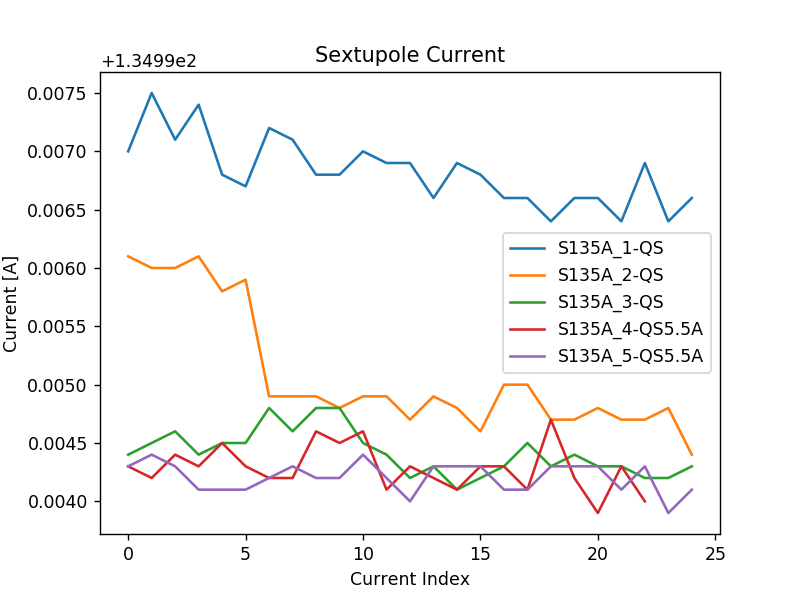

In [3]:
# Sextupole Current

serials, tdata = data[0], data[1]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Current [A]')
plt.title('Sextupole Current')
plt.legend()
plt.show()    

<IPython.core.display.Javascript object>


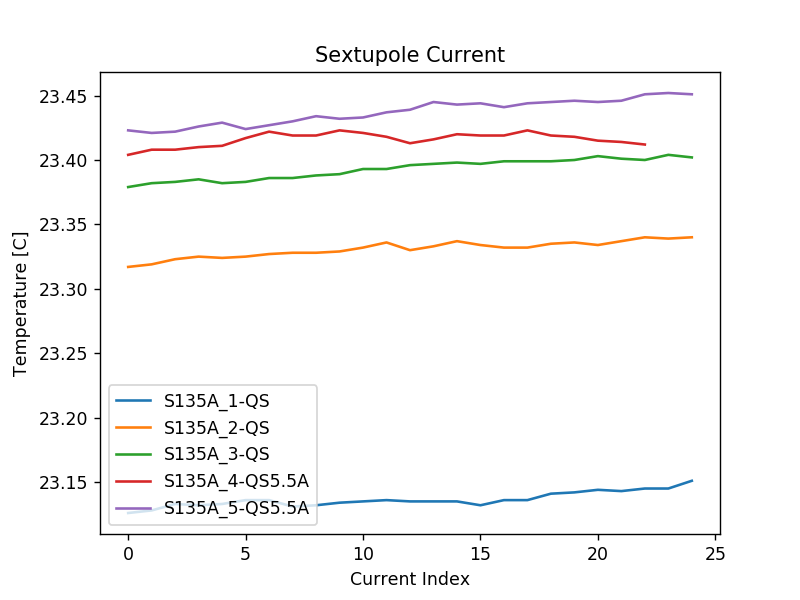

In [4]:
# Sextupole Current

serials, tdata = data[0], data[-1]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Temperature [C]')
plt.title('Sextupole Current')
plt.legend()
plt.show() 

<IPython.core.display.Javascript object>


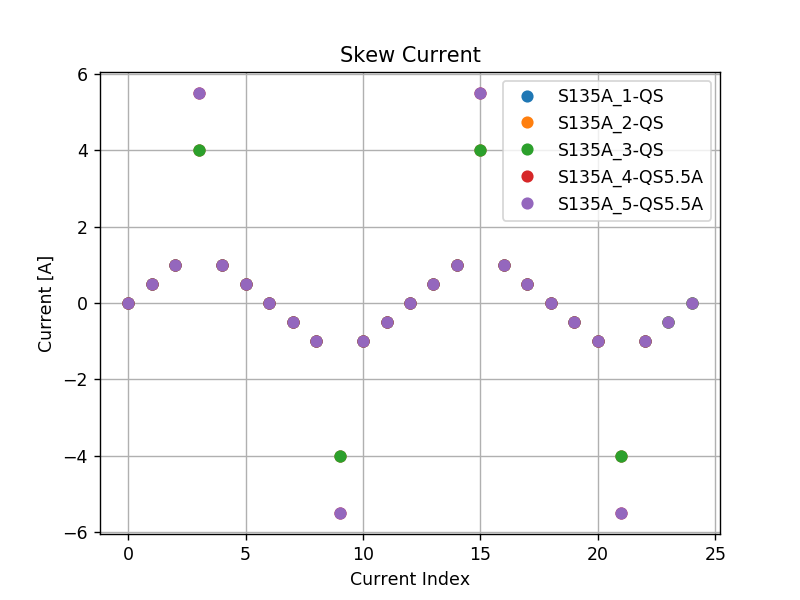

Currents:
index S135A_1-QS      :  +0.00 A
index S135A_2-QS      :  +0.00 A
index S135A_3-QS      :  +0.00 A
index S135A_4-QS5.5A  :  +0.02 A
index S135A_5-QS5.5A  :  +0.00 A


In [5]:
# Skew Coil Current

serials, tdata = data[0], data[2]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], 'o', label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Current [A]')
plt.title('Skew Current')
plt.grid()
plt.legend()
plt.show()

print('Currents:')
for i in range(len(tdata)):
    avg = np.mean(tdata[i],0)
    print('index {:15s} : {:+6.2f} A'.format(serials[i], avg))

<IPython.core.display.Javascript object>


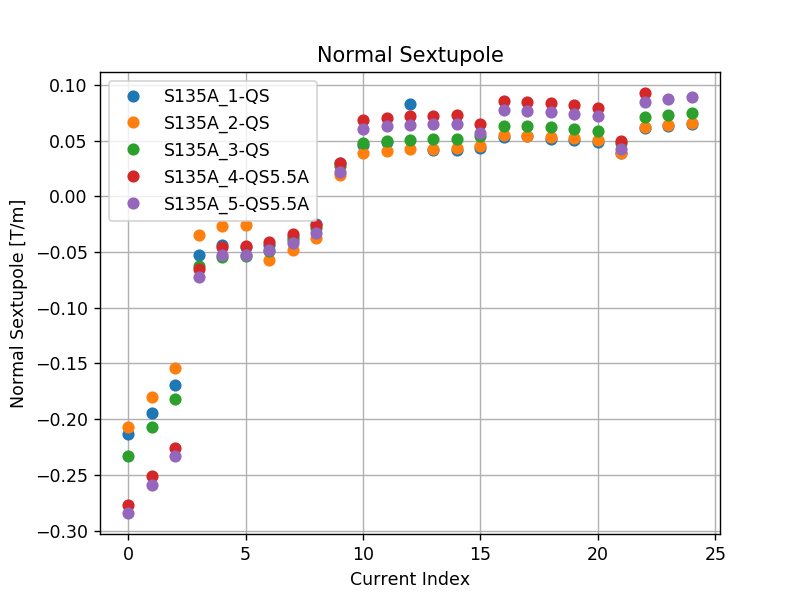

S135A_1-QS variation: 0.012 %
S135A_2-QS variation: 0.008 %
S135A_3-QS variation: 0.008 %
S135A_4-QS5.5A variation: 0.011 %
S135A_5-QS5.5A variation: 0.013 %


<IPython.core.display.Javascript object>


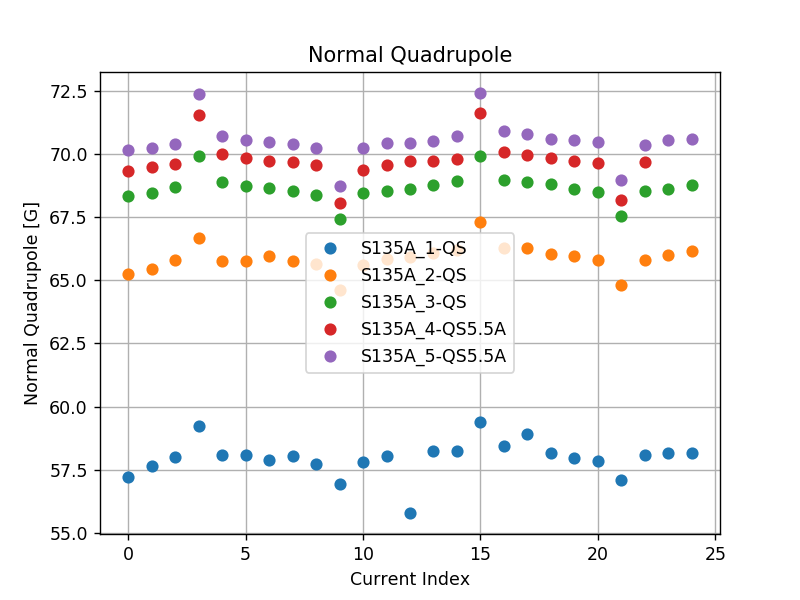

<IPython.core.display.Javascript object>


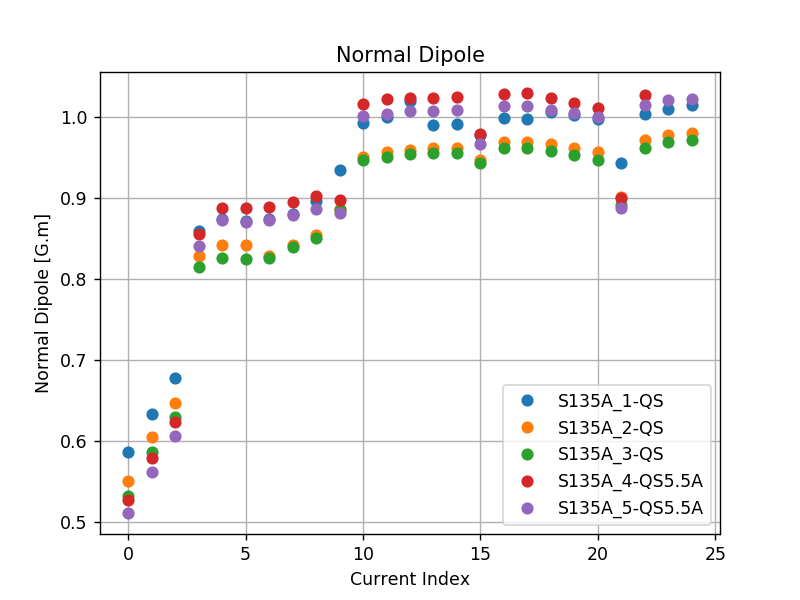

In [8]:
# Normal Sextupole
serials, tdata = data[0], data[5]
plt.figure()
for i in range(len(tdata)):
    ave = np.mean(tdata[i])
    plt.plot(100*(tdata[i]/ave - 1), 'o', label=serials[i])
#     plt.plot(tdata[i], 'o', label=serials[i])
    d = tdata[i][12:]
    print('{} variation: {:.3f} %'.format(serials[i], abs(100*np.std(d)/np.mean(d))))
plt.xlabel('Current Index')
plt.ylabel('Normal Sextupole [T/m]')
plt.title('Normal Sextupole')
plt.legend(loc='best')
plt.grid()
plt.show()
# avgs = np.mean(tdata[:,12:], 1)
# print("magnets' spread: {:.3f} %".format(abs(100*np.std(avgs)/np.mean(avgs))))


# avg = np.mean(tdata, 0)
# std = np.std(tdata, 0)
# plt.figure()
# plt.plot(100*std/avg, 'o')
# plt.xlabel('Current Index')
# plt.ylabel('Std/Avg [%]')
# plt.title('Sextupole Dispersion')
# plt.grid()
# plt.show()

# Normal Quadrupole
serials, tdata = data[0], data[4]
plt.figure()
for i in range(len(tdata)):
    plt.plot(1e4*tdata[i], 'o', label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Normal Quadrupole [G]')
plt.title('Normal Quadrupole')
plt.legend()
plt.grid()
plt.show()

# Normal Dipole
serials, tdata = data[0], data[3]
plt.figure()
for i in range(len(tdata)):
    plt.plot(1e4*tdata[i], 'o', label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Normal Dipole [G.m]')
plt.title('Normal Dipole')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


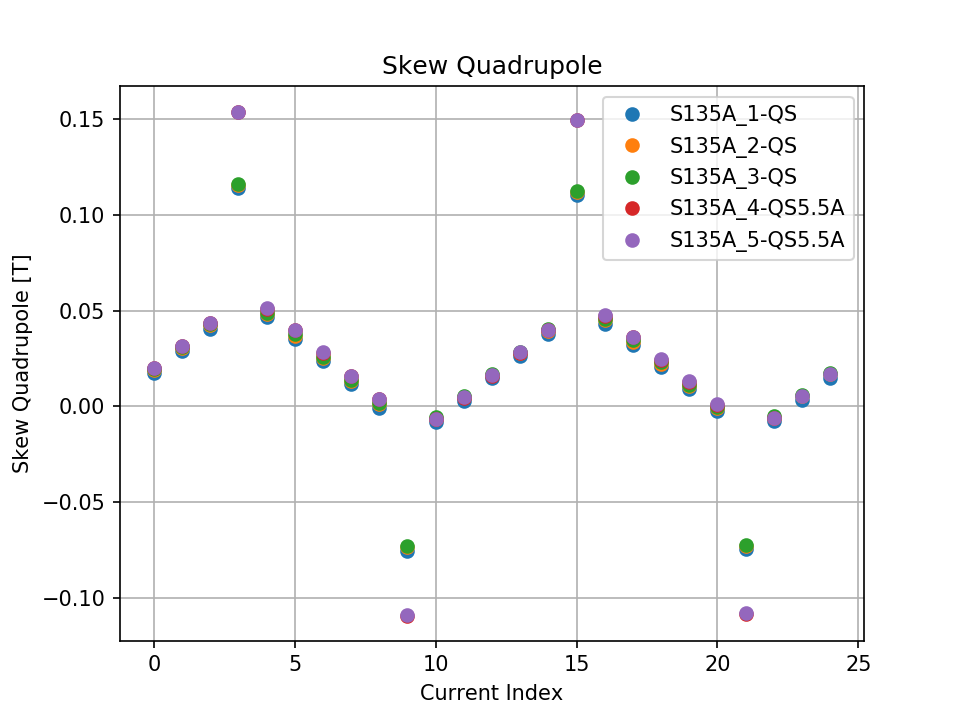

<IPython.core.display.Javascript object>


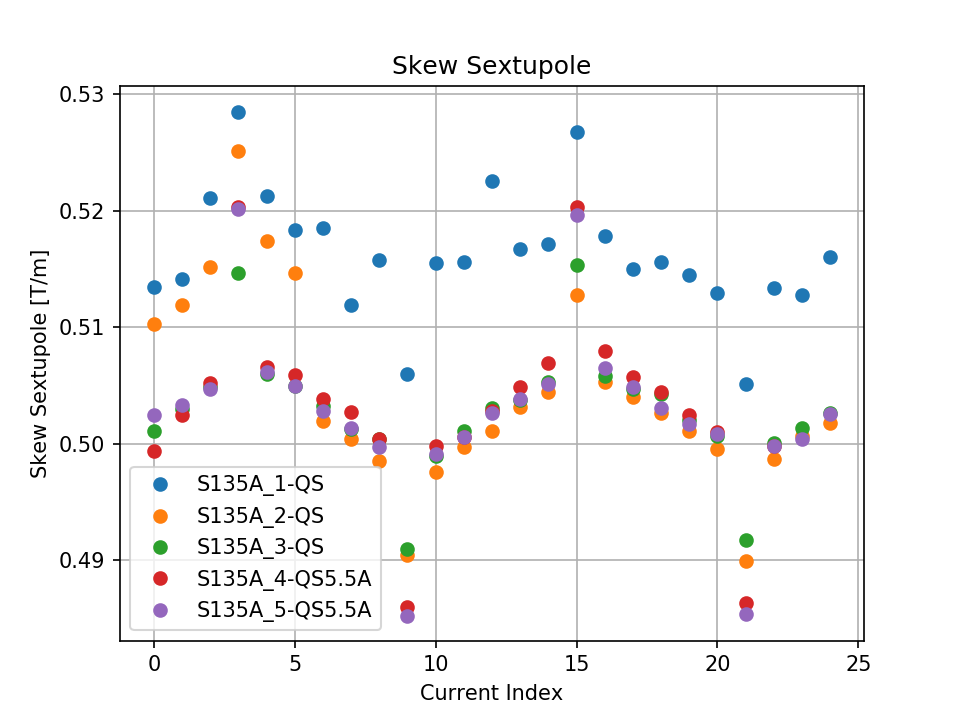

<IPython.core.display.Javascript object>


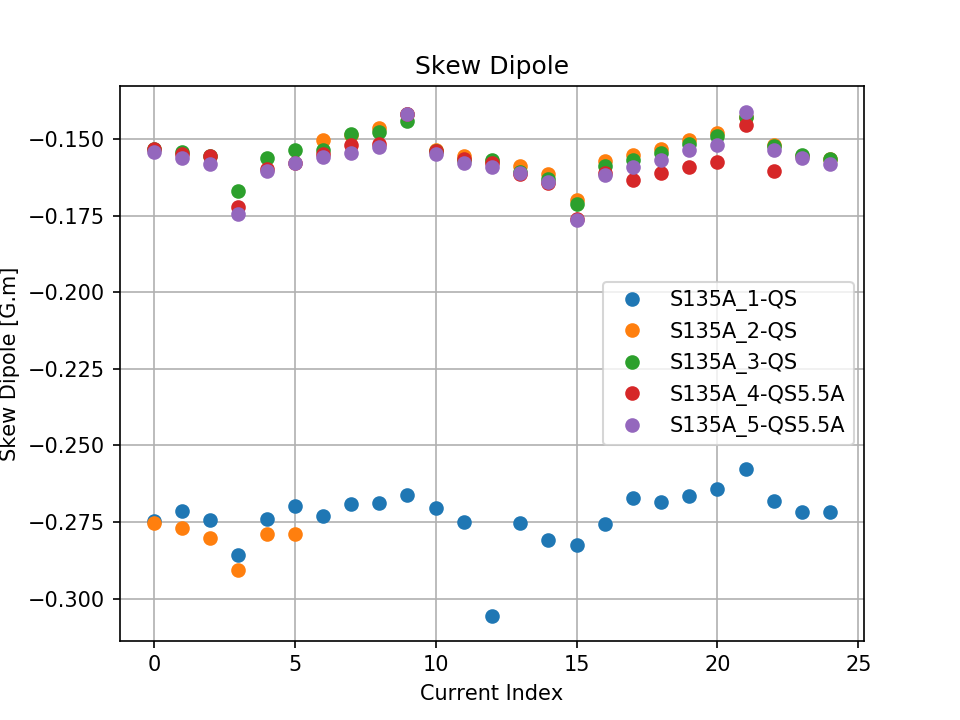

In [28]:
# Skew Quadrupole
serials, tdata = data[0], data[7]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], 'o', label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Skew Quadrupole [T]')
plt.title('Skew Quadrupole')
plt.legend()
plt.grid()
plt.show()

# Skew Sextupole
serials, tdata = data[0], data[8]
plt.figure()
for i in range(len(tdata)):
    plt.plot(tdata[i], 'o', label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Skew Sextupole [T/m]')
plt.title('Skew Sextupole')
plt.legend()
plt.grid()
plt.show()

# Skew Dipole
serials, tdata = data[0], data[6]
plt.figure()
for i in range(len(tdata)):
    plt.plot(1e4*tdata[i], 'o', label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Skew Dipole [G.m]')
plt.title('Skew Dipole')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


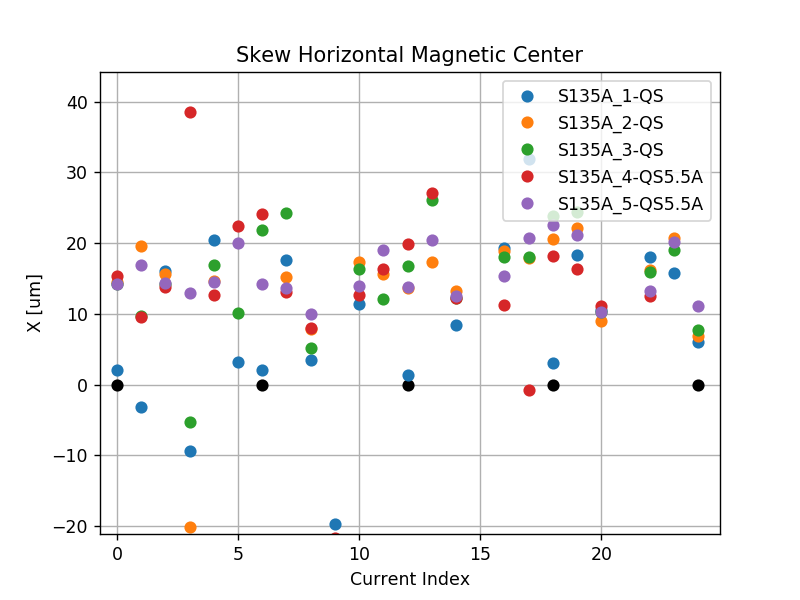

<IPython.core.display.Javascript object>


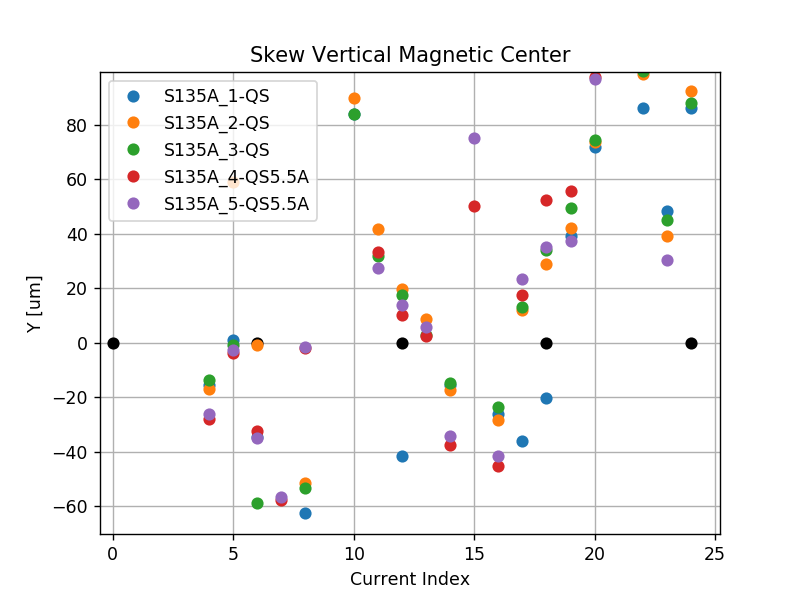

<IPython.core.display.Javascript object>


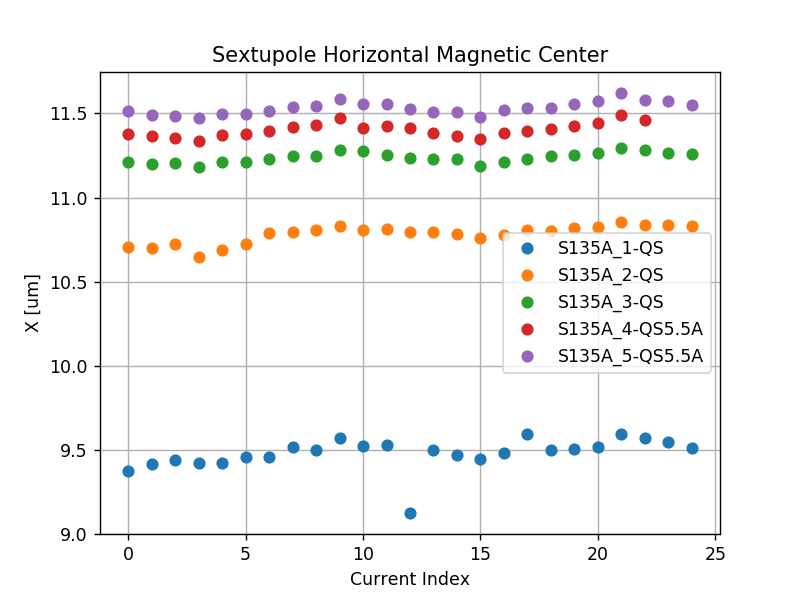

<IPython.core.display.Javascript object>


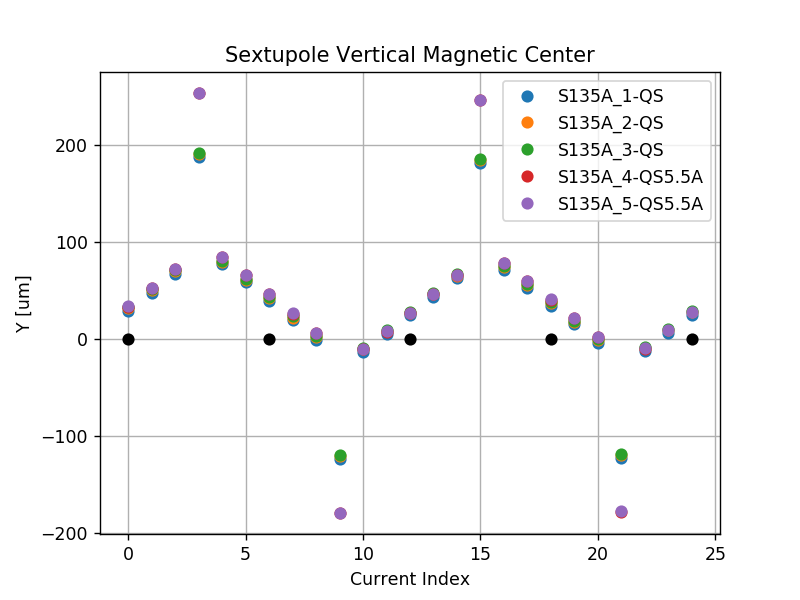

In [30]:
serials, main_coil_current_avg, qs_coil_current_avg, \
           nmpole_0, nmpole_1, nmpole_2, smpole_0, smpole_1, smpole_2 = data
    

step = 1.0

zskew = []
zsext = []
Il = []
for j in range(len(serials)):
    ind = np.arange(len(nmpole_0[j]))
    D = nmpole_0[j] + 1j * smpole_0[j]
    Q = nmpole_1[j] + 1j * smpole_1[j]
    S = nmpole_2[j] + 1j * smpole_2[j]
    # skew center
    fD = interp1d(ind, D, kind='cubic', fill_value='extrapolate')
    fQ = interp1d(ind, Q, kind='cubic', fill_value='extrapolate')
    Dl = (fD(ind + step) - fD(ind - step))/1.0
    Ql = (fQ(ind + step) - fQ(ind - step))/1.0
    zskew.append(-Dl/Ql)
    # sextupole center
    fS = interp1d(ind, S, kind='cubic', fill_value='extrapolate')
    QlSext = fQ(ind + 0*step)
    SlSext = fS(ind + 0*step)
    zsext.append(-QlSext/SlSext/2.0)
    # current
    fI = interp1d(ind, qs_coil_current_avg[j], kind='cubic', fill_value='extrapolate')
    Il.append(fI(ind))  

    
    

# plot skew center 
sel = abs(Il[0]) < 0.1
ind = np.arange(len(nmpole_0[0]))

plt.figure()
plt.plot(ind[sel], 0*ind[sel], 'ok')
for i in range(len(zskew)):
    z = zskew[i]
    plt.plot(1e6*np.real(z), 'o', label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('X [um]')
plt.grid()
plt.title('Skew Horizontal Magnetic Center')
plt.legend()
plt.show()

plt.figure()
plt.plot(ind[sel], 0*ind[sel], 'ok')
for i in range(len(zskew)):
    z = zskew[i]
    plt.plot(1e6*np.imag(z), 'o', label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Y [um]')
plt.grid()
plt.title('Skew Vertical Magnetic Center')
plt.legend()
plt.show()


# plot sextupole center 

plt.figure()
# plt.plot(ind[sel], 0*ind[sel], 'ok')
for i in range(len(zsext)):
    z = zsext[i]
    z2 = zskew[i]
    plt.plot(1e6*np.real(z), 'o', label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('X [um]')
plt.grid()
plt.title('Sextupole Horizontal Magnetic Center')
plt.legend()
plt.show()

plt.figure()
plt.plot(ind[sel], 0*ind[sel], 'ok')
for i in range(len(zsext)):
    z = zsext[i]
    z2 = zskew[i]
    plt.plot(1e6*np.imag(z), 'o', label=serials[i])
plt.xlabel('Current Index')
plt.ylabel('Y [um]')
plt.grid()
plt.title('Sextupole Vertical Magnetic Center')
plt.legend()
plt.show()